### Hand-written digit classification

Image classification is a difficult task for a computer. If an image has an 8 megapixel resolution, it has 8 mln features. This is computationally expensive and the only way to train a model on it is to downsample the resolution of an image. E.g. 128x128 or 512x512 is enough for recognizing hand-written numbers. 

Also, RGB has 256^3 variations and it is hard to train. For that reason, the image is also converted into a grayscale (no color) format.

Why does DL work good in image classification (in fact, better than humans) ? 
DL is good at learning hierarchical representations of images.


If we have a <b>convolutional neural network</b> with three hidden layers then we can observe the following:

* In the first hidden layer, NN  learns edges, features of faces.

* The second hidden layer represents higher level features such as eyes, noses. 

* The last hidden layer is matching faces.


In this project we will train neural network models to recognize [hand-written digits](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) dataset from UCI.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load data
# sklearn.datasets has a collection of datasets from UCI available for learning
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(digits.keys())
# data returned a dictionary. Let's fetch some description info
print('\n', digits['DESCR'][:646])

dict_keys(['DESCR', 'target', 'images', 'target_names', 'data'])

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.


In [3]:
print(digits['data'].shape)
# the dataset has 1797 images. Each has a size of 8x8 pixels
# Each row represents a single image with grayscale values for 64 pixels in the image
digits_df = pd.DataFrame(digits['data'])

(1797, 64)


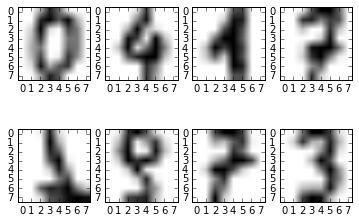

In [4]:
%matplotlib inline
# let's visualize hand-written numbers
fig = plt.figure()
im_list = [0, 100, 200, 300, 1000, 1100, 1200, 1300] # row numbers
for i in range(1,9):
    ax = fig.add_subplot(2, 4, i)
    ax.imshow(digits_df.iloc[im_list[i-1],].values.reshape(8, 8), cmap='gray_r')

We have a clear picture of how the dataset represents digits.  Each row represents a single image with grayscale values for 64 pixels in the image (8x8 grid as shown above).

We can now train our models on the dataset. Before training a neural network model, let us see how K-nearest neighbors algorithm performs. Why KNN? This algorithm can capture non-linear relationship between features whereas linear or logistic regression best captures linear relationships.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# knn training
def train(k, trainset, target):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainset, target)
    return knn

def test(model, testset, target):
    preds = model.predict(testset)
    return accuracy_score(target, preds)
    #return sum(preds==target)/len(target)

In [6]:
from sklearn.model_selection import KFold
digits_df['target'] = digits['target'] # add target y variable
# cross-validation for our training
def cross_validation(n, k):
    features = digits_df.drop('target', axis='columns')
    target = digits_df['target']
    kf = KFold(n_splits=n, shuffle=True, random_state=3)
    accs = []
    # split data and perform fitting for each split
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        # perform fitting
        #print('start training')
        model=train(k, X_train, y_train)
        #print('done training')
        accs.append(test(model, X_test, y_test))
    return np.mean(accs)

In [7]:
cross_validation(4, 5) # 4 folds

0.9855320465231378

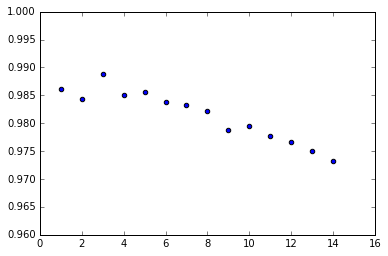

In [8]:
# let us experiment with different k values for KNN
scores = []
for i in range(1, 15):
    scores.append(cross_validation(4, i))

plt.scatter(range(1,15), scores)

As K value in KNN increases, the accuracy of KKN goes down. When K=3 the algorithm reaches the highest accuracy of around 99%

KNN has few shortcomings: 

* high memory usage because it needs to compare new observation with all the records in the dataset

* There is no model at all. KNN is an algorithm

That being said, we can now explore neural network models.

In [9]:
from sklearn.neural_network import MLPClassifier
# cross-validation for our NN training
# since we have all the function, we need to only modify the train function
def train(k, trainset, target):
    mlp = MLPClassifier(hidden_layer_sizes=k, solver='sgd')
    mlp.fit(trainset, target)
    return mlp

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



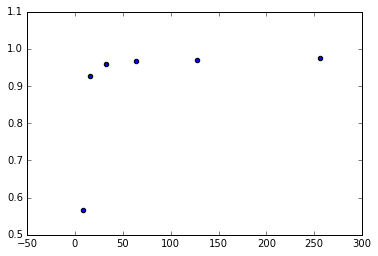

In [ ]:
# experiment with different number of neurons in a hidden layer
scores = []
neurons = [2**i for i in range(3,9)]
for nn in neurons:
    #print(nn)
    scores.append(cross_validation(4, (nn,)))

plt.scatter(neurons, scores)

In [ ]:
# two hidden layers
scores2 = []
neurons = [10, 64]
for nn in neurons:
    #print(nn)
    scores2.append(cross_validation(4, (nn, nn)))

plt.scatter(neurons, scores2)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [ ]:
# three hidden layers
scores3 = []
neurons = [10, 64, 128]
for nn in neurons:
    #print(nn)
    scores3.append(cross_validation(6, (nn, nn, nn)))

plt.scatter(neurons, scores3)